MainProcess


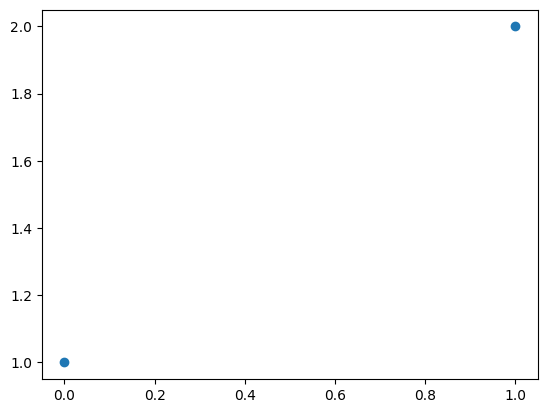

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])
fastMode = False

In [2]:
#Prepare datasets
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_0_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 0, 'n_ensemble': 2, 'n_epochs': 64, 'use_best_epoch': False, 'lr0': 0.0005885545395196437, 'cos_lr': False, 'dropout': 0.0016527635528529095, 'mosaic': 1.0, 'concentration': 2, 'box': 6.932911252305191, 'extra_data': False, 'trust_neg': 0, 'trust_extra': 3, 'model_name': 'yolov8m', 'use_pretrained_weights': True, 'blur_xy': 43.05217271363305, 'blur_z': 12.237803311822983, 'scale_moving_std': False, 'erasing': 0.4}


In [4]:
#model.step1Labels.use_best_epoch = False
#model.step1Labels.cos_lr = False
#model.step1Labels.lrf = 1.0
#model.step1Labels.patience = 0
#model.train_data_selector.datasets = ['tom']


model = loaded_data.untrained_model


model.step1Labels.n_ensemble = 1
# model.step1Labels.n_epochs = 61
# model.step1Labels.mosaic=0.0
# model.step1Labels.close_mosaic = 1000000
# model.step1Labels.lr0 = 0.001
# model.step1Labels.box = 7.5
# model.step1Labels.dropout = 0.0
model.step1Labels.preprocessor.blur_xy = 30.
model.step1Labels.preprocessor.blur_z = 0.
model.step1Labels.use_pretrained_weights = False
model.step1Labels.preprocessor.scale_moving_std = True
train_data = loaded_data.train_data
test_data = loaded_data.test_data
epoch_list = [50,60]
if fastMode:
    model.step1Labels.n_epochs = 15
    model.step1Labels.trust = 0
    train_data = train_data[::10]
    test_data = test_data[::10]
    epoch_list = [5,10]
#model.step1Labels.mixup = 0.0

In [5]:
for sed in range(1):
    seed = sed
    model2 = copy.deepcopy(model)
    model2.seed = seed
    model2.train(train_data, test_data)
    fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
    import shutil
    shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
    import ultralytics
    data_list = []
    for epoch in epoch_list:
        model2.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
        model2.step1Labels.concentration = 2
        model2.run_in_parallel=True
        data_list.append(model2.infer(test_data))
        fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
    fls.dill_save(fls.temp_dir + 'intermediate_data' + str(seed) + '.pickle', data_list)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: d:/flagellar/temp//yolo_dataset/
- YAML configuration: d:/flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at d:/flagellar/temp/training.yaml
Using YAML file: d:/flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: d:/flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.131 available  Update with 'pip install -U ultralytics'
WARNING  'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.yaml, data=d:/flagellar/temp/training.yaml, epochs=64, time=None, patience=0, batch=12, imgsz=640, save=True, save_period=5, ca

train: Scanning D:\flagellar\temp\yolo_dataset\labels\train... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████

train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: WARNING  D:\flagellar\temp\yolo_dataset\images\train\tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds 

train: New cache created: D:\flagellar\temp\yolo_dataset\labels\train.cache
val: Fast image access  (ping: 0.00.0 ms, read: 14.83.5 MB/s, size: 81.1 KB)


val: Scanning D:\flagellar\temp\yolo_dataset\labels\val... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/

val: New cache created: D:\flagellar\temp\yolo_dataset\labels\val.cache


Plotting labels to d:\flagellar\temp\yolo_weights\motor_detector\labels.jpg... 
optimizer: AdamW(lr=0.0005885545395196437, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to d:\flagellar\temp\yolo_weights\motor_detector
Starting training for 64 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369     0.0142     0.0596     0.0033   0.000615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.441      0.509      0.413      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.448      0.553      0.431      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.718      0.827      0.767      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.565       0.71      0.633      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.625      0.602      0.673      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.672      0.702      0.707      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.814      0.699      0.793      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.831      0.764      0.823      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.816      0.732      0.809      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.923      0.732      0.872      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.862      0.694        0.8      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.919      0.802      0.877      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.872       0.85      0.895      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.932      0.856      0.924      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.923      0.886       0.95      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.929      0.851      0.914      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.884      0.821      0.875      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.901      0.913      0.953      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.932      0.849      0.932      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.891      0.843      0.913      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.934      0.811      0.895      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369       0.95      0.894      0.938      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.905      0.846      0.907       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.912      0.859      0.955      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.931      0.847      0.924       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.955      0.894      0.943      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.932      0.889      0.946      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.967      0.913      0.956      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.961      0.875      0.948      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.902      0.849       0.92      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.918      0.921      0.963      0.528


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.963      0.889      0.936      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.943      0.913      0.958      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.934      0.911      0.934      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.973       0.87      0.934      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.962      0.893      0.937      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.962      0.883      0.956      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.974      0.908      0.957      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.953      0.908      0.951      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.94      0.837       0.94      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.955      0.913      0.951      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.963      0.923       0.97      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.964      0.897      0.954      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.977       0.92      0.957      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.988      0.927      0.963      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.946      0.894      0.952      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.95      0.936      0.956      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.991      0.892      0.961      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.966      0.922      0.968      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.972      0.943       0.97      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.979      0.883       0.94      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.982      0.912      0.962      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.976      0.916      0.955      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.955      0.932      0.958      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369       0.96      0.918      0.967      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369       0.98      0.913      0.972      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.968        0.9      0.967      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.961      0.908       0.95      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03

                   all        393        369      0.983      0.889      0.941       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.977      0.913      0.964      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.977      0.939      0.975      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.969      0.923      0.969      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02

                   all        393        369      0.947      0.922      0.965      0.588



64 epochs completed in 0.836 hours.
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\last.pt, 52.0MB
Optimizer stripped from d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt, 52.0MB

Validating d:\flagellar\temp\yolo_weights\motor_detector\weights\best.pt...
Ultralytics 8.3.110  Python-3.10.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
YOLOv8m summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05

                   all        393        369      0.958       0.92      0.964      0.551
Speed: 0.2ms preprocess, 8.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to d:\flagellar\temp\yolo_weights\motor_detector
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\best.pt, 52.0MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch0.pt, 52.0MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch10.pt, 52.0MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch15.pt, 52.0MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch20.pt, 52.1MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch25.pt, 52.1MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch30.pt, 52.1MB
Optimizer stripped: d:/flagellar/temp/yolo_weights/motor_detector/weights\epoch35.pt, 52.1MB
Optimizer stripped: d:/fla

<ErrorbarContainer object of 3 artists>

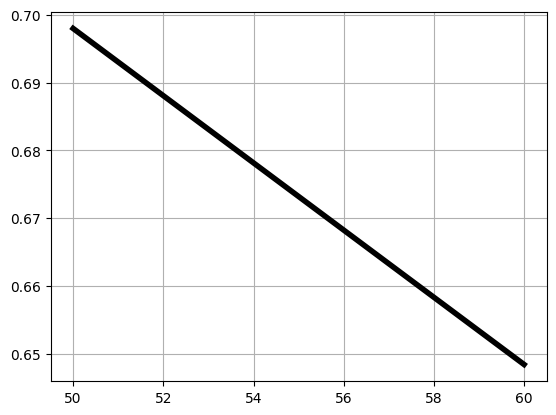

In [6]:
plt.figure()
plt.grid(True)
all_scores = []
files = glob.glob(fls.temp_dir + 'intermediate_data0.pickle')
for f in files:
    data_list = fls.dill_load(f)
    import flg_diagnostics
    import importlib
    importlib.reload(flg_diagnostics)
    scores = []
    for d in data_list:
        a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
        scores.append(fls.score_competition_metric(a,b)[2])
    plt.plot(epoch_list,scores)
    all_scores.append(scores)
all_scores=np.array(all_scores)
plt.errorbar(epoch_list, np.mean(all_scores,axis=0), yerr = np.std(all_scores,axis=0)/np.sqrt(all_scores.shape[0]), linewidth=4, color='black')

In [7]:
import scipy.stats
scipy.stats.ttest_1samp(all_scores[:,3]-all_scores[:,2],0)

IndexError: index 3 is out of bounds for axis 1 with size 2

In [ ]:
def score_with_random(data, rng, val):
    model2=copy.deepcopy(model)
    model2.state = 1
    test_data = copy.deepcopy(loaded_data.test_data)
    data = copy.deepcopy(data)
    for d in data:
        d.labels_unfiltered2['confidence'] = d.labels_unfiltered2['confidence']+val*rng.normal(0,1,(len( d.labels_unfiltered2),))
    
    model2.data_after_step2 = data
    model2.run_in_parallel = False
    import io
    import contextlib
    
    with contextlib.redirect_stdout(io.StringIO()) as f:
        inferred_data = model2.infer(test_data)
    
    inferred_data, test_data = flg_diagnostics.expand_and_reinfer(inferred_data, test_data, model.step3Output.select_motors, 0.7)
    return fls.score_competition_metric(inferred_data, test_data)[2]

In [ ]:
plt.figure()
plt.grid(True)
all_scores = []
files = glob.glob(fls.temp_dir + 'intermediate_data*.pickle')
for f in files:
    data_list = fls.dill_load(f)
    import flg_diagnostics
    import importlib
    importlib.reload(flg_diagnostics)
    scores = []
    for d in data_list:
        #a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
        rng = np.random.default_rng(seed=0)
        sl =[]
        for ii in range(5):
            sl.append(score_with_random(d, rng, 0.1))
        scores.append(np.mean(sl))
    plt.plot(epoch_list,scores)
    all_scores.append(scores)
all_scores=np.array(all_scores)
plt.errorbar(epoch_list, np.mean(all_scores,axis=0), yerr = np.std(all_scores,axis=0)/np.sqrt(all_scores.shape[0]), linewidth=4, color='black')